## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [2]:
df_train = pd.read_csv("Titanic_train.csv")

## 觀察 Age

In [3]:
df_train[['Age','Pclass','Sex']].describe()

,Age,Pclass
count,714.000000,891.000000
mean,29.699118,2.308642
std,14.526497,0.836071
min,0.420000,1.000000
25%,20.125000,2.000000
50%,28.000000,3.000000
75%,38.000000,3.000000
max,80.000000,3.000000


In [4]:
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])

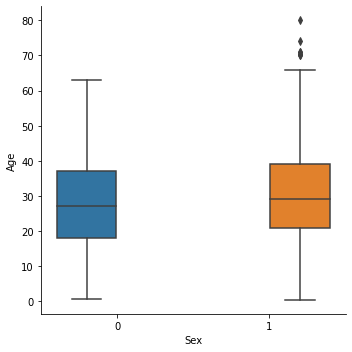

In [6]:
#男生年齡比女生大
g = sns.catplot(x="Sex", y="Age", hue="Sex",
               data=df_train, kind="box")

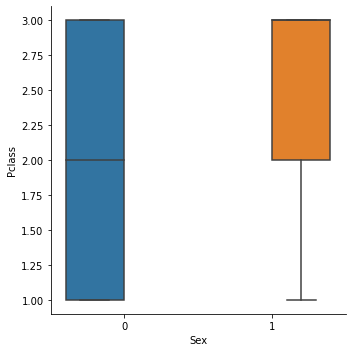

In [7]:
#男生倉別集中在2等艙以上居多
g = sns.catplot(x="Sex", y="Pclass", hue="Sex",
               data=df_train, kind="box")

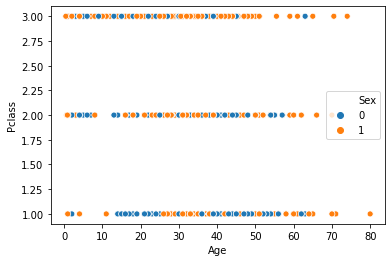

In [5]:
g = sns.scatterplot(x="Age", y="Pclass", hue="Sex",
               data=df_train)

In [8]:
#查看缺失值 Age有177個缺失
data = df_train[['Age','Pclass','Sex']]
display(data[data.isnull().values==True].head(5))
missing = data.isnull()
print(missing.sum())

,Age,Pclass,Sex
5,NaN,3,1
17,NaN,2,1
19,NaN,3,0
26,NaN,3,1
28,NaN,3,0


Age       177
Pclass      0
Sex         0
dtype: int64


In [9]:
#KNN補值
value_neighbors = 1
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,weights='uniform')
data_filled = pd.DataFrame(imputer.fit_transform(data),columns=['Age','Pclass','Sex'])
display(data_filled[missing.values==True].head(5))
missing_count = data_filled['Age'].isnull().sum()
print(f'missing count = {missing_count}')

,Age,Pclass,Sex
5,22.0,3.0,1.0
17,35.0,2.0,1.0
19,26.0,3.0,0.0
26,22.0,3.0,1.0
28,26.0,3.0,0.0


missing count = 0
